In [29]:
# This notebook was written for Python 2.7
import FlowCytometryTools as fct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from operator import truediv
from scipy import stats

%matplotlib inline

In [30]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)

bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}
bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

# Data import from .csv files

In [31]:
cyto_20190305 = pd.read_csv('20190305_cytosol', sep = '\t', index_col = 0)
cyto_20190318 = pd.read_csv('20190318_cytosol', sep = '\t', index_col = 0)
cyto_20190319 = pd.read_csv('20190319_cytosol', sep = '\t', index_col = 0)

cytosol = pd.concat([cyto_20190305, cyto_20190318, cyto_20190319])

In [32]:
cytosol.head()
cytosol.tail()
cytosol.sample(n = 10)

,pH,time,genotype
21058,5.695403,4,wildtype
16546,6.480135,10,wildtype
32421,6.442180,12,snf1
23048,6.798463,0,hxk2
3880,6.553629,0,wildtype
34447,7.742738,-1,snf1
11254,5.977614,6,wildtype
25755,6.760604,4,wildtype
7536,6.307298,6,wildtype
13075,6.060089,12,snf1


In [33]:
mito_20190305 = pd.read_csv('20190305_mito', sep = '\t', index_col = 0)
mito_20190318 = pd.read_csv('20190318_mito', sep = '\t', index_col = 0)
mito_20190319 = pd.read_csv('20190319_mito', sep = '\t', index_col = 0)

mito = pd.concat([mito_20190305, mito_20190318, mito_20190319])

In [34]:
mitotracker_20190305 = pd.read_csv('20190305_mitotracker', sep = '\t', index_col = 0)
mitotracker_20190306 = pd.read_csv('20190306_mitotracker', sep = '\t', index_col = 0)
mitotracker_20190307 = pd.read_csv('20190307_mitotracker', sep = '\t', index_col = 0)

mitotracker = pd.concat([mitotracker_20190305, mitotracker_20190306, mitotracker_20190307])

In [35]:
mitotracker.head()
mitotracker.tail()
mitotracker.sample(n = 10)

,mCherry-A,time,genotype
29738,2.626063,10,snf1
33547,4.044914,2,snf1
25870,4.436964,12,hxk2
33940,3.026055,2,wildtype
33431,3.195482,0,hxk2
35804,3.764783,0,snf1
19354,5.246036,10,wildtype
33110,3.679372,4,snf1
14618,3.392183,8,hxk2
20472,3.822350,0,wildtype


In [36]:
pH_times = list(mito.time.unique())

In [37]:
cytosol_wt = cytosol[cytosol['genotype'] == 'wildtype']
cytosol_snf1 = cytosol[cytosol['genotype'] == 'snf1']
cytosol_hxk2 = cytosol[cytosol['genotype'] == 'hxk2']

In [38]:
mito_wt = mito[mito['genotype'] == 'wildtype']
mito_snf1 = mito[mito['genotype'] == 'snf1']
mito_hxk2 = mito[mito['genotype'] == 'hxk2']

In [39]:
mitotracker_wt = mitotracker[mitotracker['genotype'] == 'wildtype']
mitotracker_snf1 = mitotracker[mitotracker['genotype'] == 'snf1']
mitotracker_hxk2 = mitotracker[mitotracker['genotype'] == 'hxk2']

In [40]:
subtimes = [-1, 0, 4, 8, 12]

In [41]:
cytosol_subtimes = cytosol[cytosol['time'].isin(subtimes)]

In [42]:
mito_subtimes = mito[mito['time'].isin(subtimes)]

In [43]:
cytosol_wt.head()

,pH,time,genotype
0,8.760803,-1,wildtype
1,7.697140,-1,wildtype
2,8.722995,-1,wildtype
3,10.563121,-1,wildtype
4,6.644463,-1,wildtype


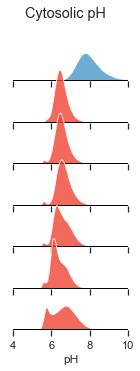

In [44]:
sns.set_context('paper', font_scale = 1.5)
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})

#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal = [blues[5], reds[5], reds[5], reds[5], reds[5], reds[5], reds[5]]
sns.set_palette(pal)

plot_wt_cyto = cytosol_wt[['pH', 'time']]
plot_wt_cyto = plot_wt_cyto[plot_wt_cyto['time'] != 10]

g = sns.FacetGrid(plot_wt_cyto, row = 'time', hue = 'time', palette = pal,
                 aspect = 3, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'pH', shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

def label(x, color, label):
    ax = plt.gca()
    #ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
    #       ha = 'left', va = 'center', transform = ax.transAxes)

    
g.map(label, 'pH')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(4, 10)
    #axes[ax,0].set_ylabel('timetime', fontsize = 16)
    if ax == 6:
        axes[ax,0].set_xlabel('pH')
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('Cytosolic pH')
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)


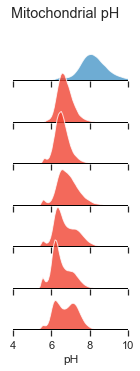

In [45]:
sns.set_context('paper', font_scale = 1.5)
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = [blues[5], reds[5], reds[5], reds[5], reds[5], reds[5], reds[5]]
sns.set_palette(pal)

plot_wt_mito = mito_wt[['pH', 'time']]
plot_wt_mito = plot_wt_mito[plot_wt_mito['time'] != 12]

g = sns.FacetGrid(plot_wt_mito, row = 'time', hue = 'time', palette = pal,
                 aspect = 3, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'pH', shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

def label(x, color, label):
    ax = plt.gca()
    #ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
    #       ha = 'left', va = 'center', transform = ax.transAxes)

g.map(label, 'pH')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(4, 10)
    #axes[ax,0].set_ylabel('timetime', fontsize = 16)
    if ax == 6:
        axes[ax,0].set_xlabel('pH')
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('Mitochondrial pH')
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

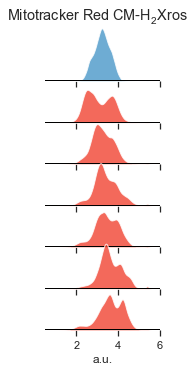

In [46]:
sns.set_context('paper', font_scale = 1.5)
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = [blues[5], reds[5], reds[5], reds[5], reds[5], reds[5], reds[5]]
sns.set_palette(pal)

plot_wt_mitotracker = mitotracker_wt[['mCherry-A', 'time']]
plot_wt_mitotracker = plot_wt_mitotracker[plot_wt_mitotracker['time'] != 10]

g = sns.FacetGrid(plot_wt_mitotracker, row = 'time', hue = 'time', palette = pal,
                 aspect = 3, height = 0.75, legend_out = True);
g.map(sns.kdeplot, 'mCherry-A', shade = True, alpha = 0.8, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black');

def label(x, color, label):
    ax = plt.gca()
    #ax.text(0, 0.2, time_labels[times.index(int(label))], fontweight = 'bold', color = 'black', fontsize = 16,
    #       ha = 'left', va = 'center', transform = ax.transAxes)

g.map(label, 'mCherry-A')
axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(0.5, 6)
    #axes[ax,0].set_ylabel('timetime', fontsize = 16)
    if ax == 6:
        axes[ax,0].set_xlabel('a.u.')
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('Mitotracker Red CM-$\mathregular{H_{2}}$Xros')
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [47]:
subtimes_merged = [-1, 0, 2, 4, 6, 8, 12]

In [48]:
cytosol_sub1 = cytosol_wt[cytosol_wt['time'].isin(subtimes_merged)]
cytosol_sub1.loc[:, 'coll'] = 'wt'

cytosol_sub2 = cytosol_snf1[cytosol_snf1['time'].isin(subtimes_merged)]
cytosol_sub2.loc[:, 'coll'] = 'snf'

cytosol_sub3 = cytosol_hxk2[cytosol_hxk2['time'].isin(subtimes_merged)]
cytosol_sub3.loc[:, 'coll'] = 'hxk'

cytosol_sub4 = pd.concat([cytosol_sub2, cytosol_sub3, cytosol_sub1])
cytosol_sub4.loc[:, 'coll'] = 'merge'

In [49]:
cytosol_super = pd.concat([cytosol_sub2, cytosol_sub1, cytosol_sub3, cytosol_sub4])

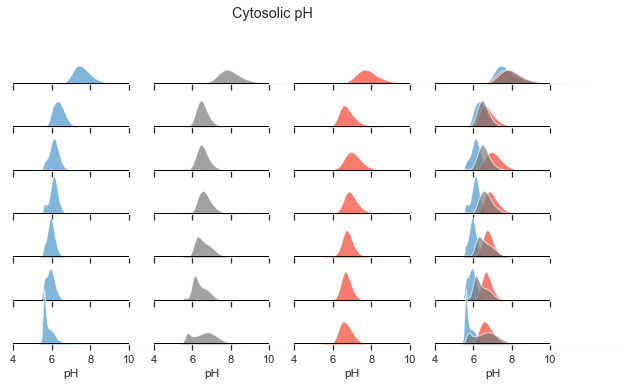

In [50]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = [blues[8], blues[2], blues[5]]
pal = [blues[5], reds[5], grays[5]]
sns.set_palette(pal)


g = sns.FacetGrid(cytosol_super, row = 'time', col = 'coll', palette = pal, hue = 'genotype',
                 aspect = 2.75, height = 0.75, legend_out = True, hue_order = ['snf1', 'hxk2', 'wildtype'])
g.map(sns.kdeplot, 'pH', clip_on = False, shade = True, alpha = 0.7, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black')

axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(4, 10)
    if ax == 6:
        axes[ax,0].set_xlabel('pH')
        axes[ax, 1].set_xlabel('pH')
        axes[ax, 2].set_xlabel('pH')
        axes[ax, 3].set_xlabel('pH')
        
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('Cytosolic pH')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)


In [51]:
subtimes_mito = [-1, 0, 2, 4, 6, 8, 10]

mito_sub1 = mito_wt[mito_wt['time'].isin(subtimes_mito)]
mito_sub1.loc[:, 'coll'] = 'wt'

mito_sub2 = mito_snf1[mito_snf1['time'].isin(subtimes_mito)]
mito_sub2.loc[:, 'coll'] = 'snf'

mito_sub3 = mito_hxk2[mito_hxk2['time'].isin(subtimes_mito)]
mito_sub3.loc[:, 'coll'] = 'hxk2'

mito_sub4 = pd.concat([mito_sub2, mito_sub3, mito_sub1])
mito_sub4.loc[:, 'coll'] = 'merge'

In [52]:
mito_super = pd.concat([mito_sub2, mito_sub1, mito_sub3, mito_sub4])

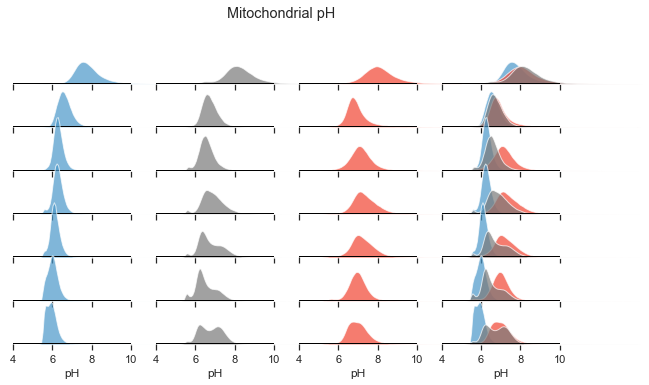

In [53]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = [blues[8], blues[2], blues[5]]
pal = [blues[5], reds[5], grays[5]]
sns.set_palette(pal)


g = sns.FacetGrid(mito_super, row = 'time', col = 'coll', palette = pal, hue = 'genotype',
                 aspect = 2.75, height = 0.75, legend_out = True, hue_order = ['snf1', 'hxk2', 'wildtype'])
g.map(sns.kdeplot, 'pH', clip_on = False, shade = True, alpha = 0.7, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black')

axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(4, 10)
    if ax == 6:
        axes[ax,0].set_xlabel('pH')
        axes[ax, 1].set_xlabel('pH')
        axes[ax, 2].set_xlabel('pH')
        axes[ax, 3].set_xlabel('pH')
        
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('Mitochondrial pH')

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [54]:
mitotracker_sub1 = mitotracker_wt[mitotracker_wt['time'].isin(subtimes_merged)]
mitotracker_sub1.loc[:, 'coll'] = 'wt'

mitotracker_sub2 = mitotracker_snf1[mitotracker_snf1['time'].isin(subtimes_merged)]
mitotracker_sub2.loc[:, 'coll'] = 'snf'

mitotracker_sub3 = mitotracker_hxk2[mitotracker_hxk2['time'].isin(subtimes_merged)]
mitotracker_sub3.loc[:, 'coll'] = 'hxk2'

mitotracker_sub4 = pd.concat([mitotracker_sub2, mitotracker_sub3, mitotracker_sub1])
mitotracker_sub4.loc[:, 'coll'] = 'merge'

In [55]:
mitotracker_super = pd.concat([mitotracker_sub2, mitotracker_sub1, mitotracker_sub3, mitotracker_sub4])

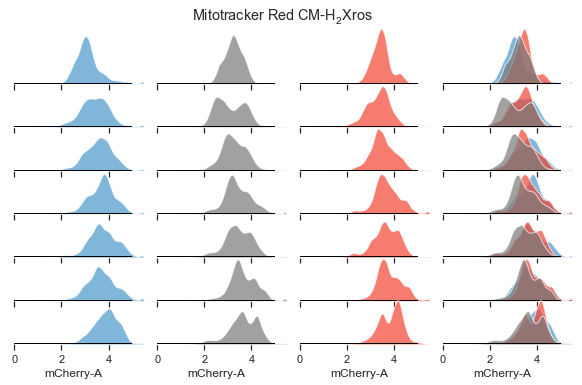

In [56]:
sns.set(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = [blues[8], blues[2], blues[5]]
pal = [blues[5], reds[5], grays[5]]
sns.set_palette(pal)


g = sns.FacetGrid(mitotracker_super, row = 'time', col = 'coll', palette = pal, hue = 'genotype',
                 aspect = 2.75, height = 0.75, legend_out = True, hue_order = ['snf1', 'hxk2', 'wildtype'])
g.map(sns.kdeplot, 'mCherry-A', clip_on = False, shade = True, alpha = 0.7, lw = 0);
g.map(plt.axhline, y = 0, lw = 2, color = 'black')

axes = g.axes
for ax in range(len(axes)):
    axes[ax,0].set_xlim(0, 5)
    if ax == 6:
        axes[ax,0].set_xlabel('mCherry-A')
        axes[ax, 1].set_xlabel('mCherry-A')
        axes[ax, 2].set_xlabel('mCherry-A')
        axes[ax, 3].set_xlabel('mCherry-A')
        
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

g.fig.suptitle('Mitotracker Red CM-$\mathregular{H_{2}}$Xros' )

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)